<a href="https://colab.research.google.com/github/Namtk214/AIO-Homework/blob/main/Week2_Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import các thư viện cần thiết

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

lấy bộ dataset và visualize

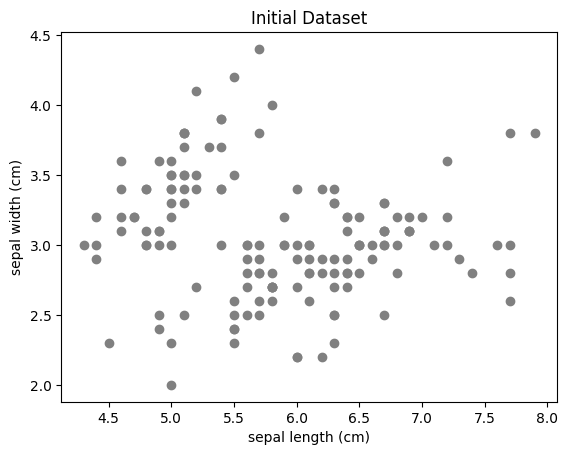

In [4]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2]

#Plot data
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title('Initial Dataset')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


Tạo một class Kmeans và tạo các hàm cần thiết

In [14]:
class KMeans:
  def __init__(self, k=3, max_iters=100):
    self.k = k
    self.max_iters = max_iters
    self.centroids = None
    self.clusters = None

  def initialize_centroids(self, data):
    np.random.seed(42)
    self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

  def euclidean_distance(self, x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

  def assign_clusters(self, data):
    distances = np.array([[self.euclidean_distance(x, c) for c in self.centroids] for x in data])
    return np.argmin(distances, axis=1)

  def update_centroids(self, data, clusters):
    new_centroids = np.array([np.mean(data[clusters == i], axis=0) for i in range(self.k)])
    return new_centroids

  def plot_final_clusters(self, data):
      plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
      plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x', s=100)
      plt.title('Final Clusters')
      plt.xlabel('sepal length (cm)')
      plt.ylabel('sepal width (cm)')
      plt.show()

  def fit(self, data):
    self.initialize_centroids(data)
    for i in range(self.max_iters):
      self.clusters = self.assign_clusters(data)
      self.plot_clusters(data, i)
      new_centroids = self.update_centroids(data, self.clusters)
      if np.all(self.centroids == new_centroids):
        break
      self.centroids = new_centroids
    self.plot_final_clusters(data)

  def plot_clusters(self, data, iteration):
    plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x', s=100)
    plt.title(f'Iteration {iteration + 1}')
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.show()



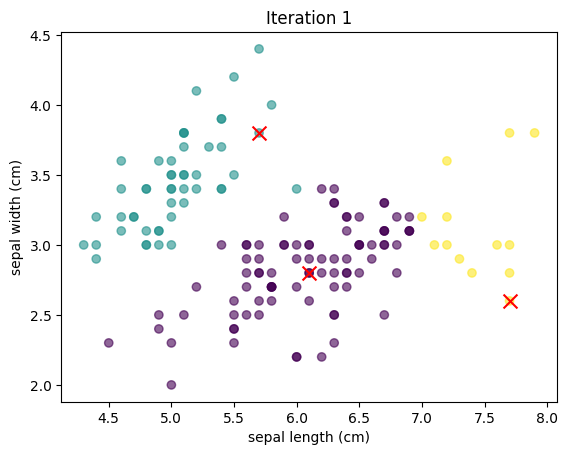

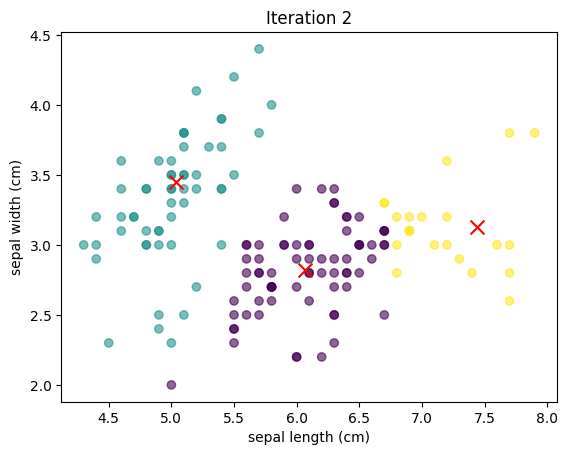

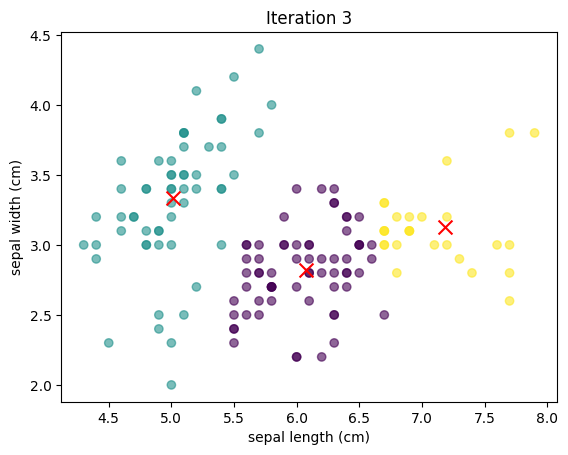

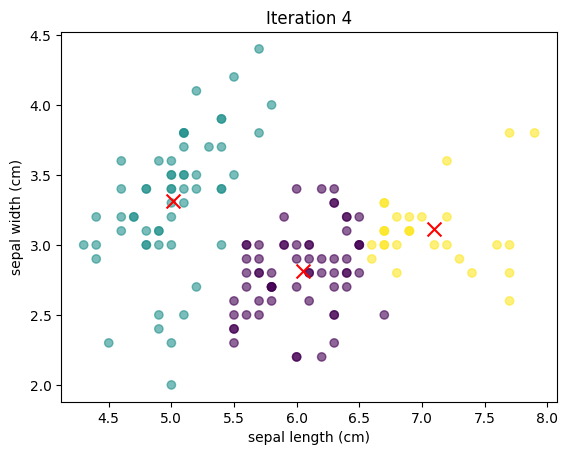

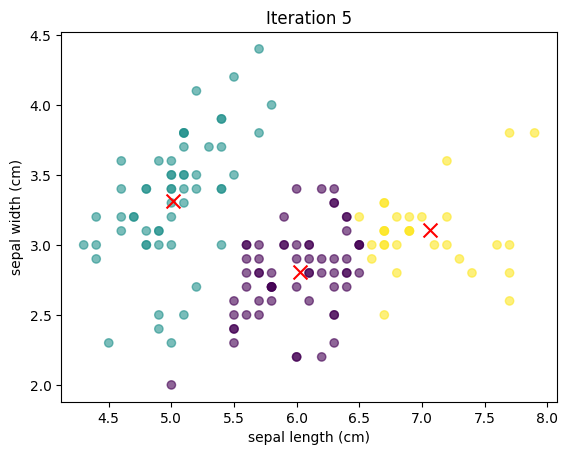

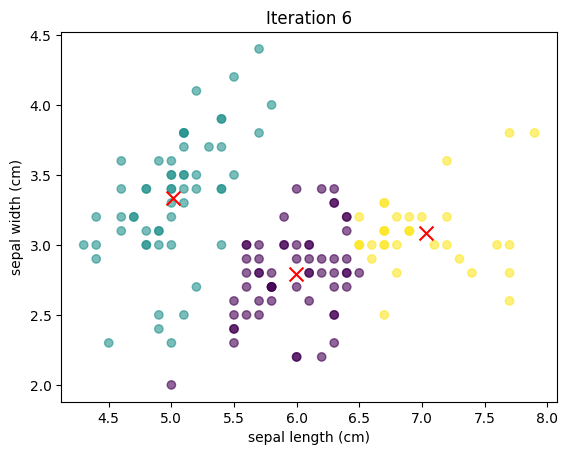

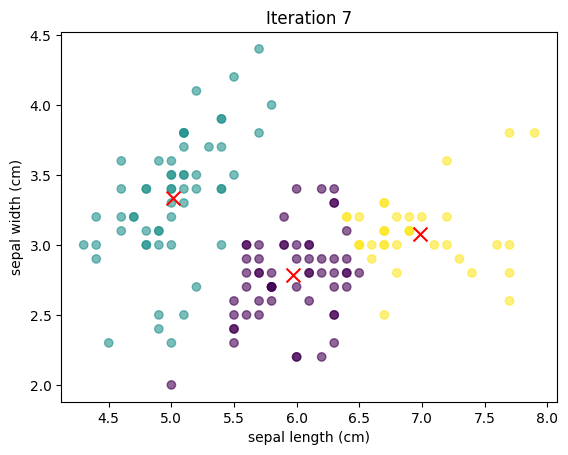

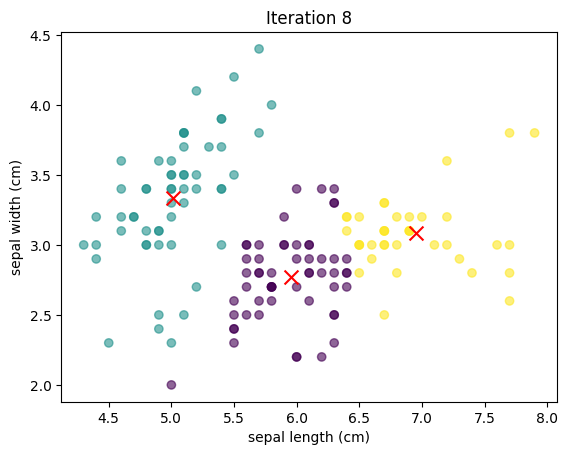

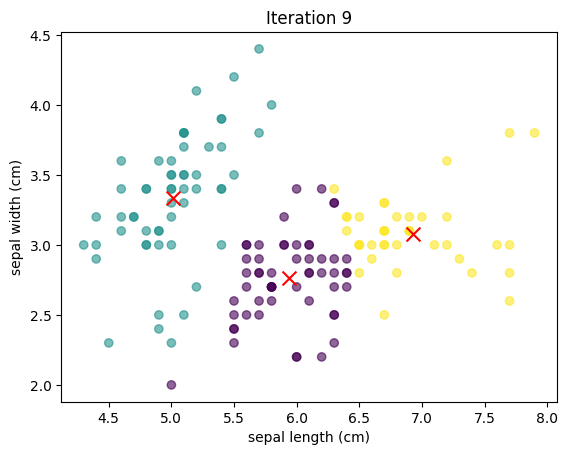

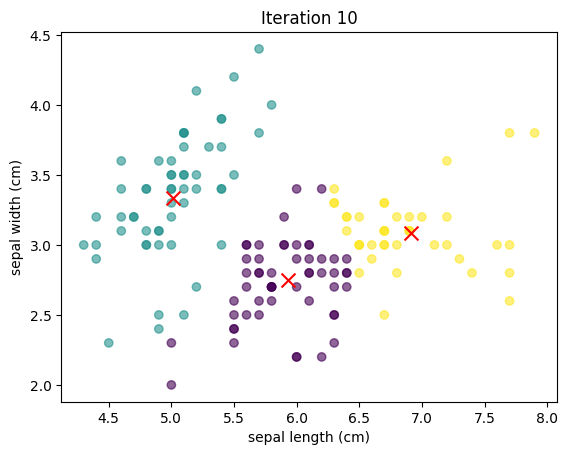

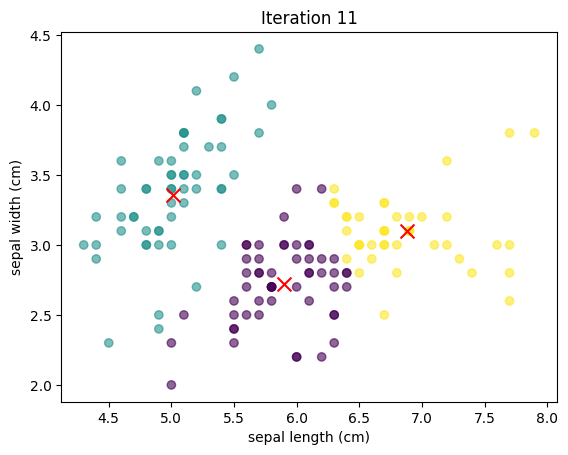

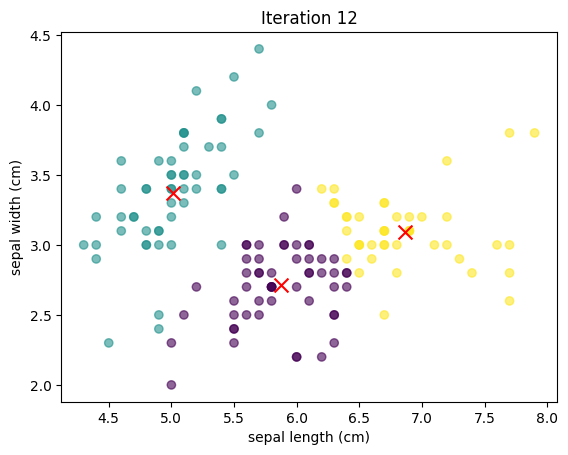

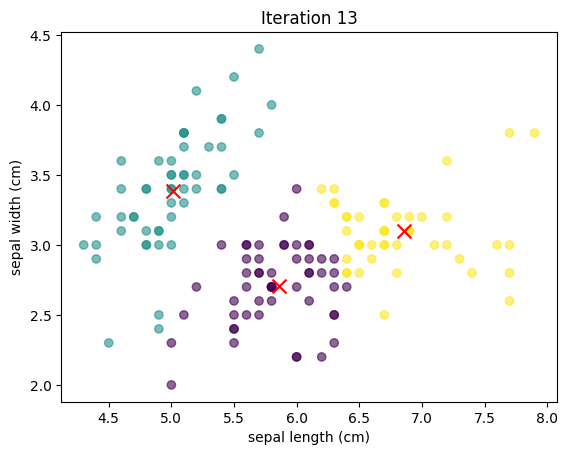

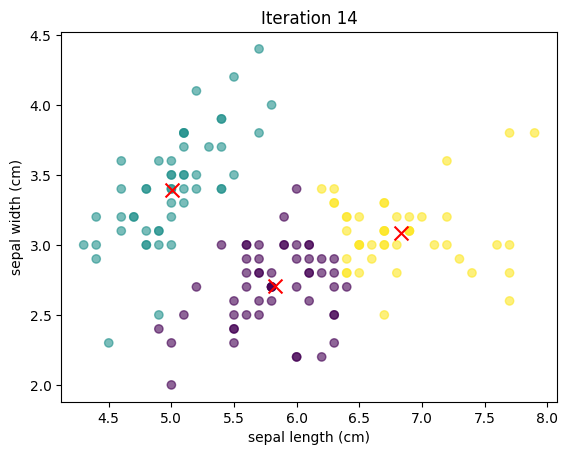

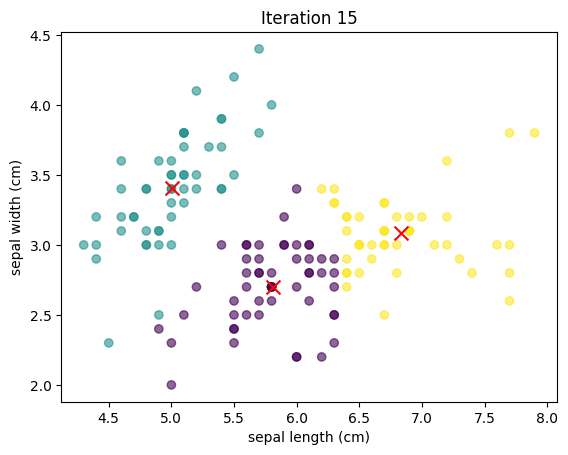

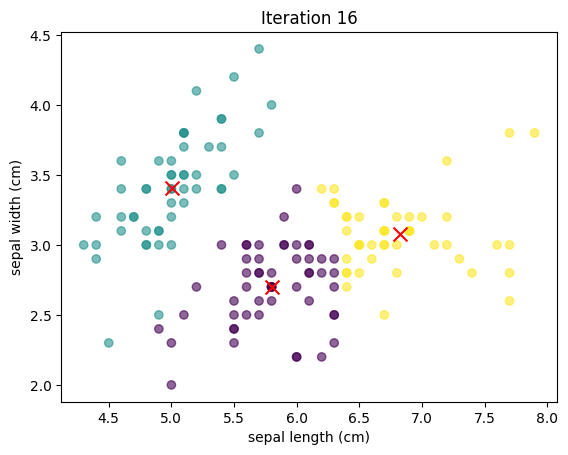

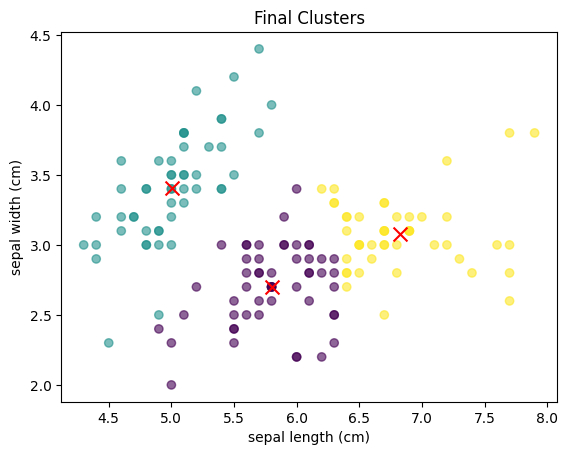

In [15]:
kmeans = KMeans(k=3)
kmeans.fit(data)


Kmeans Using Sklearn

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(data)
kmeans.labels_
kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

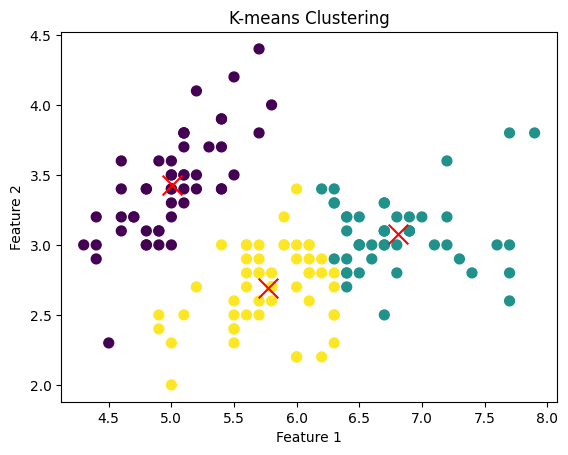

In [21]:
# Vẽ các điểm dữ liệu, tô màu theo cụm
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

# Vẽ các tâm cụm
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
